In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

## Import Oil Dataset in DataFrame

In [2]:
oil_df = pd.read_csv('model_data.csv')
oil_df

,Unnamed: 0,WTI,BRENT,ARAB_LIGHT,RIGS,FUEL_CONS,USA_OIL
0,1,22.69,20.50,19.73,514,100.859751,11.311850
1,2,21.55,19.20,18.71,492,100.248437,11.264940
2,3,20.34,17.95,16.76,478,99.413921,11.085530
3,4,18.50,16.35,14.86,484,100.126514,11.155130
4,5,17.47,15.30,14.72,493,99.861039,11.027760
...,...,...,...,...,...,...,...
361,362,44.83,51.31,52.48,678,68.295183,7.327776
362,363,20.51,14.85,24.14,663,68.269186,7.437338
363,364,19.23,18.11,22.30,471,66.229312,7.367632
364,365,35.57,34.15,31.84,267,66.664741,7.316165


## Multiple Linear Regression Predicting WTI Oil Price from Number of Rigs, Fuel Consumption and USA Oil Prices

In [3]:
# Assign the data to X and y

X = oil_df[["RIGS", "FUEL_CONS", "USA_OIL"]]
y = oil_df["WTI"].values.reshape(-1, 1)
print(X.shape, y.shape)


(366, 3) (366, 1)


In [4]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [5]:
# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [6]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"WTI Oil Model Training Score: {training_score}")
print(f"WTI Oil Model Testing Score: {testing_score}")
print(f"WTI Oil Model MSE: {MSE}")


WTI Oil Model Training Score: 0.6479149966237274
WTI Oil Model Testing Score: 0.646753203660285
WTI Oil Model MSE): 0.3437254370606362


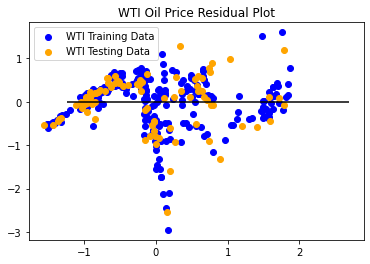

In [11]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="WTI Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="WTI Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("WTI Oil Price Residual Plot")
plt.show()

In [17]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"WTI Ridge Model Testing MSE: {MSE}")
print (f"WTI Ridge Model Testing Score R2: {r2}")

WTI Ridge Model Testing MSE: 0.3437281075681112
WTI Ridge Model Testing Score R2: 0.6467504591784736


In [28]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print (f"WTI Elastic Net Model Testing Score R2: {r2}")
print(f"WTI Elastic Net Model Testing MSE: {MSE}")


WTI Elastic Net Model Testing Score R2: 0.7011536583503057
WTI Elastic Net Model Testing MSE: 0.28506191667842457


## Multiple Linear Regression Predicting Brent Oil Price from Number of Rigs, Fuel Consumption and USA Oil Prices

In [19]:
# Assign the data to X and y

X = oil_df[["RIGS", "FUEL_CONS", "USA_OIL"]]
y = oil_df["BRENT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 3) (366, 1)


In [20]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [21]:
# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [22]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [24]:
# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"BRENT Oil Model Training Score: {training_score}")
print(f"BRENT Oil Model Testing Score: {testing_score}")
print(f"BRENT Oil Model MSE: {MSE}")


Brent Oil Model Training Score: 0.7066499798450274
Brent Oil Model Testing Score: 0.7017482899724101
Brent Oil Model MSE: 0.28449471271340704


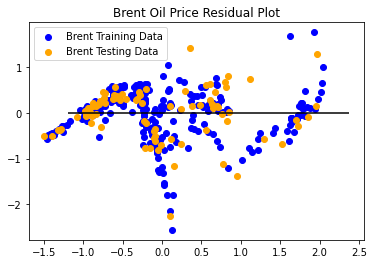

In [25]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="BRENT Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="BRENT Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("BRENT Oil Price Residual Plot")
plt.show()

In [27]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print (f"BRENT Ridge Model Testing Score R2: {r2}")
print(f"BRENT Ridge Model Testing MSE: {MSE}")


Brent Ridge Model Testing Score R2: 0.701745151797331
Brent Ridge Model Testing MSE: 0.2844977061387172


In [29]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print (f"BRENT Elastic Net Model Testing Score R2: {r2}")
print(f"BRENT Elastic Net Model Testing MSE: {MSE}")


Brent Elastic Net Model Testing Score R2: 0.7011536583503057
Brent Elastic Net Model Testing MSE: 0.28506191667842457


## Multiple Linear Regression Predicting ARAB LIGHT Oil Price from Number of Rigs, Fuel Consumption and USA Oil Prices

In [30]:
# Assign the data to X and y

X = oil_df[["RIGS", "FUEL_CONS", "USA_OIL"]]
y = oil_df["ARAB_LIGHT"].values.reshape(-1, 1)
print(X.shape, y.shape)

(366, 3) (366, 1)


In [31]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [32]:
# Create a StandardScaler model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [33]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [34]:
# Fit the model to the training data and calculate the scores for the training and testing data

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from sklearn.metrics import mean_squared_error
model.fit(X_train_scaled, y_train_scaled)
predictions = model.predict(X_test_scaled)


training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)


print(f"ARAB LIGHT Oil Model Training Score: {training_score}")
print(f"ARAB LIGHT Oil Model Testing Score: {testing_score}")
print(f"ARAB LIGHT Oil Model MSE: {MSE}")


ARAB LIGHT Oil Model Training Score: 0.7123403322651868
ARAB LIGHT Oil Model Testing Score: 0.7202569259370255
ARAB LIGHT Oil Model MSE: 0.2502674405691103


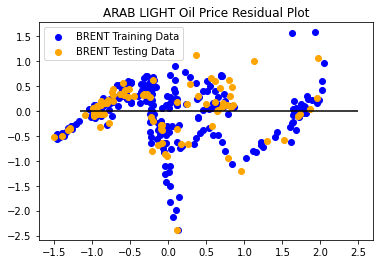

In [35]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="BRENT Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="BRENT Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("ARAB LIGHT Oil Price Residual Plot")
plt.show()

In [36]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print (f"ARAB LIGHT Ridge Model Testing Score R2: {r2}")
print(f"ARAB LIGHT Ridge Model Testing MSE: {MSE}")


ARAB LIGHT Ridge Model Testing Score R2: 0.7202552827513595
ARAB LIGHT Ridge Model Testing MSE: 0.2502689106175552


In [37]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print (f"ARAB LIGHT Elastic Net Model Testing Score R2: {r2}")
print(f"ARAB LIGHT Elastic Net Model Testing MSE: {MSE}")


ARAB LIGHT Elastic Net Model Testing Score R2: 0.7202020638177047
ARAB LIGHT Elastic Net Model Testing MSE: 0.2503165220422893
